# ***How to statistically win in F1***

##### By: *Alejandro Echaniz, Ben Flemming, Goutham Korada*
Formula 1 is a growing and fast paced sport where economics, statistics, engineering, and driving skills win. Here within our data set, we observe the past 30 drivers
F1 has seen, viewing their personal statistics to determine what is required for a successful career within the sport.
We 

### **Step 1 : Initial Setup & Import Statements**
We specifically import libraries from python so that we can carry out data science actions, such as taking in data on a JSON file and converting it into a CSV file. matplotlib and statsmodels both help us visualize the data and research we have gathered so that we can validate our hypothesises

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json
import csv

### **Step 2 : Data Processing**
We first start by creating a JSON file of the research gathered online for F1. After creating the JSON file via Firebase, we are *now* able to convert it into a CSV file.

CSV files in Python make Data Science extremely efficient and easy to use, as the python libraries provide all the functionality we need. Most importantly, we can use the functionality of the csv python library to take in the JSON code and transfer it to text file so that we can create our first **dataframe**

In [26]:
with open('f1-comparisons.json') as json_file:
    data = json.load(json_file)
names = data['Most Recent F1 Drivers']
data_file = open('C:/Users/aecha/OneDrive/Documents/Github/Tamid-TechEdu-S22/Final/f1-comparisons.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(names[0].keys())
for name in names:
    csv_writer.writerow(name.values())
data_file.close()

### **Step 3 : Data Integration**
Now that we have a CSV file to work with, we can now convert the file into a dataframe to help us visualize, analyze, and create future potential predictions within F1

Another important aspect within data science is being able to work with "clean" data. Within our dataframe that we are going to create, our ***Salary*** column possesses a ',' character; therefore, to make matters easier in
analyzing our data, we are going to remove the commas so that the compiler can recognize Salary as integers rather than String objects. Working with integers is especially important within data science as we do not have to 
overcomplicate converting Strings into integers, vice versa

In [27]:
df = pd.read_csv('f1-comparisons.csv')
df

,Age,Current Team,Fastest Lap Times,Laps Raced,Name,Nationality,Number of Seasons,On Grid,Podiums,Racing Number,Salary,Total Points Won,Wins,World Titles
0,24,Red Bull Racing,16,8304,Max Verstappen,Netherlands,8,True,61,1,"25,000,000",1582.5,21,1
1,32,McLaren,16,12482,Daniel Ricciardo,Australian,12,True,32,3,"17,000,000",1282.0,8,0
2,22,McLaren,3,4390,Lando Norris,United Kingdom,4,True,5,4,"20,000,000",322.0,0,0
3,34,Aston Martin Racing,38,16157,Sebastian Vettel,German,16,True,122,5,"15,000,000",3601.0,53,4
4,26,Williams,0,2977,Latifi,Canada,3,True,0,6,"1,000,000",7.0,0,0
5,26,AlphaTauri,3,5535,Pierre Gasly,France,6,True,3,10,"5,000,000",315.0,1,0
6,32,Red Bull Racing,6,12776,Sergio Perez,Mexico,12,True,16,11,"8,000,000",960.0,2,0
7,40,Alpine,23,18622,Fernando Alonso,Spain,19,True,98,14,"20,000,000",1982.0,32,2
8,24,Ferrari,7,5061,Charles Leclerc,Monaco,5,True,16,16,"12,000,000",631.0,4,0
9,23,Aston Martin Racing,0,6346,Lance Stroll,Canada,6,True,3,18,"10,000,000",176.0,0,0


In [28]:
df.replace(',','', regex=True, inplace=True)
df

,Age,Current Team,Fastest Lap Times,Laps Raced,Name,Nationality,Number of Seasons,On Grid,Podiums,Racing Number,Salary,Total Points Won,Wins,World Titles
0,24,Red Bull Racing,16,8304,Max Verstappen,Netherlands,8,True,61,1,25000000,1582.5,21,1
1,32,McLaren,16,12482,Daniel Ricciardo,Australian,12,True,32,3,17000000,1282.0,8,0
2,22,McLaren,3,4390,Lando Norris,United Kingdom,4,True,5,4,20000000,322.0,0,0
3,34,Aston Martin Racing,38,16157,Sebastian Vettel,German,16,True,122,5,15000000,3601.0,53,4
4,26,Williams,0,2977,Latifi,Canada,3,True,0,6,1000000,7.0,0,0
5,26,AlphaTauri,3,5535,Pierre Gasly,France,6,True,3,10,5000000,315.0,1,0
6,32,Red Bull Racing,6,12776,Sergio Perez,Mexico,12,True,16,11,8000000,960.0,2,0
7,40,Alpine,23,18622,Fernando Alonso,Spain,19,True,98,14,20000000,1982.0,32,2
8,24,Ferrari,7,5061,Charles Leclerc,Monaco,5,True,16,16,12000000,631.0,4,0
9,23,Aston Martin Racing,0,6346,Lance Stroll,Canada,6,True,3,18,10000000,176.0,0,0


In [29]:
# df['Salary'] = pd.to_numeric(df['Salary'])
# df['Salary']
df2 = df[['Name','Salary']]
df2


,Name,Salary
0,Max Verstappen,25000000
1,Daniel Ricciardo,17000000
2,Lando Norris,20000000
3,Sebastian Vettel,15000000
4,Latifi,1000000
5,Pierre Gasly,5000000
6,Sergio Perez,8000000
7,Fernando Alonso,20000000
8,Charles Leclerc,12000000
9,Lance Stroll,10000000


### **4. Data Visualization**
Cleaning our dataframe now, we can now visualize our data through different graphs. Fortunately, Python provides countless different graphs to see our data; therefore, we are going to use several different graphs to envision possible corrolations:


1. Laps Raced to Podiums
    - Scatterplot with line of best fit
2. Winners
    - Boxplot
3. Losers
    - Boxplot

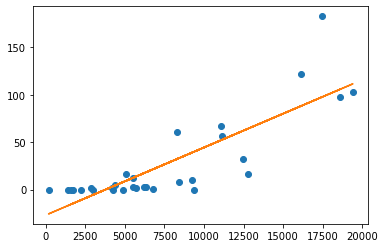

In [30]:
x = 'Laps Raced'
y = 'Podiums'
plt.plot(x, y, data=df, linestyle = 'none', marker = 'o')
m, b = np.polyfit(df[x], df[y], 1)
plt.plot(df[x], m * df[x] + b)

#### 4.1: Laps Raced x Podiums Scatterplot
Observing the data, we can now deduce that the more experience a driver has (More laps raced) has a **positive corrolation** to podiums

<AxesSubplot:>

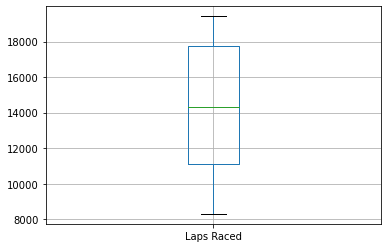

In [31]:
winners = df.loc[df['Wins'] >= 5]
winners.boxplot(column=['Laps Raced'])

#### 4.2: Winners Scatterplot
To achieve at more than five wins in your F1 career, you must achieve at least 14,000 laps.

Analyzing 30 drivers across the grid, for those that have won five or more races had completed an average lap count of 14,000.

<AxesSubplot:>

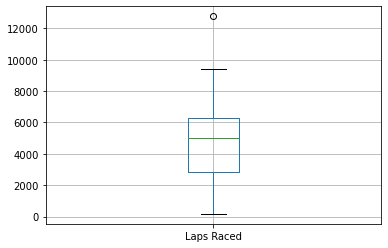

In [32]:
losers = df.loc[df['Wins'] < 5]
losers.boxplot(column=['Laps Raced'])

#### 4.3: Losers - Podiums Scatterplot
For achieving less than 5 wins within your F1 career, you must achieve at least 5,000 laps.

Analyzing 30 drivers across the grid, for those that have won less than five races had completed an average lap count of 5,000.

##### Observations:
Viewing our graphs, we noticed a positive corrolation for the scatterplot of laps raced associated to wins. Upon further inspection, we see that drivers with around 5,000 laps win less than five races, compared to more experienced drivers who have won five or more races.

We can now use ***Ordinary Least Squares*** (OLS) to confirm our observations of a positive corrolation of laps raced to wins.

### **Step 5 : Data Validation**
We are going to create both a *Null* and *Alternate Hypothesis* based on our graphs from step 4 while using OLS to confirm our hypotheses.

#### Null Hypothesis
- *The average rate of change between Laps Raced (x) and Podiums (y) **will equal 0***

#### Alternate Hypothesis
- *The average rate of change between Laps Raced and Podiums will not equal 0. Furthermore, the rate of change **will increase** by the slope value within our linear regression*

In [33]:
x = df[['Laps Raced']]
y = df[['Podiums']]
regression = sm.OLS(x, y)
results = regression.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Laps Raced   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.674
Method:                 Least Squares   F-statistic:                              63.11
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    9.24e-09
Time:                        19:04:06   Log-Likelihood:                         -298.94
No. Observations:                  30   AIC:                                      599.9
Df Residuals:                      29   BIC:                                      601.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Observations
- R-squared (uncetered) --> 68.5% of *Laps Raced* explains *Podiums*
- t --> 7.944 Value output by the linear regression test
    - Used in computing probability of something falling in the region of rejection
- P --> Probability value equals 0
    - Because our probability value = 0 and is < 0.5 (Alpha, standard value for rejecting the null hypothesis), **we successfully reject the null hypothesis**

*Since we have successfully rejected the null hypothesis, we now have **statistically significant** evidence that the average rate of change between Laps Raced and Podiums **will not equal 0** and rather increase with our linear regression slope*


### **Step 6 : Future Predictions**
Using our regression model to create a prediction through machine learning and compare them to our old values